In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
names = ['num_reaction','num_comment','num_share','num_like','num_love','num_wow','num_haha','num_sad','num_angry','num_expression','num_good','num_bad','num_old']
colors = ['purple', 'blue', 'green', 'cyan', 'yellow']
clusters = 3
classes = ['video', 'photo', 'link', 'status']

In [3]:
data = pd.read_csv ('../dataset/original.csv',index_col = 0)
data = data.dropna(axis = 1) # 去除后四列无用信息

In [4]:
data['num_emotion'] = data['num_loves'] + data['num_wows'] + data['num_hahas'] + data['num_sads'] + data['num_angrys']
data['num_good'] = data['num_likes'] + data['num_loves'] + data['num_wows'] + data['num_hahas']
data['num_bad'] = data['num_sads'] + data['num_angrys']

# 将状态类型更改为整数
data['class'] = data['status_type']
data['class'][data['status_type'] == 'video'] = 0
data['class'][data['status_type'] == 'photo'] = 1
data['class'][data['status_type'] == 'link'] = 2
data['class'][data['status_type'] == 'status'] = 3

/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_45940/34551110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][data['status_type'] == 'video'] = 0
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_45940/34551110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'][data['status_type'] == 'photo'] = 1
/var/folders/hb/9qr23dms0lg2_mgzzyhsqyhh0000gn/T/ipykernel_45940/34551110.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [5]:
X = data.iloc[:, 2:]
X = np.array(X)

In [6]:
def plot_2d(x, y, clusters, labels, titl):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    for i in range(clusters):
        plt.scatter(x[y==i,0], x[y==i,1], s=50, c=colors[i], label=f'cluster{i}')
    plt.title(titl)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.subplot(1, 2, 2)
    for i in range(4):
        plt.scatter(x[X[:,12]==i,0], x[X[:,12]==i,1], s=50, c=colors[i], label=classes[i])
    plt.title('original_class')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()

def plot_3d(x, y, clusters, labels, titl):
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(121, projection='3d')
    for i in range(clusters):
        ax.scatter(x[y == i, 0], x[y == i, 1], x[y == i, 2], s=50, c=colors[i], label=f'cluster{i}')
    plt.title(titl)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.legend()

    ax = fig.add_subplot(122, projection='3d')
    for i in range(4):
        ax.scatter(x[X[:,12]==i,0], x[X[:,12]==i,1], x[X[:,12]==i,2], s=50, c=colors[i], label=classes[i])
    plt.title('original_class')
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.legend()
    plt.show()

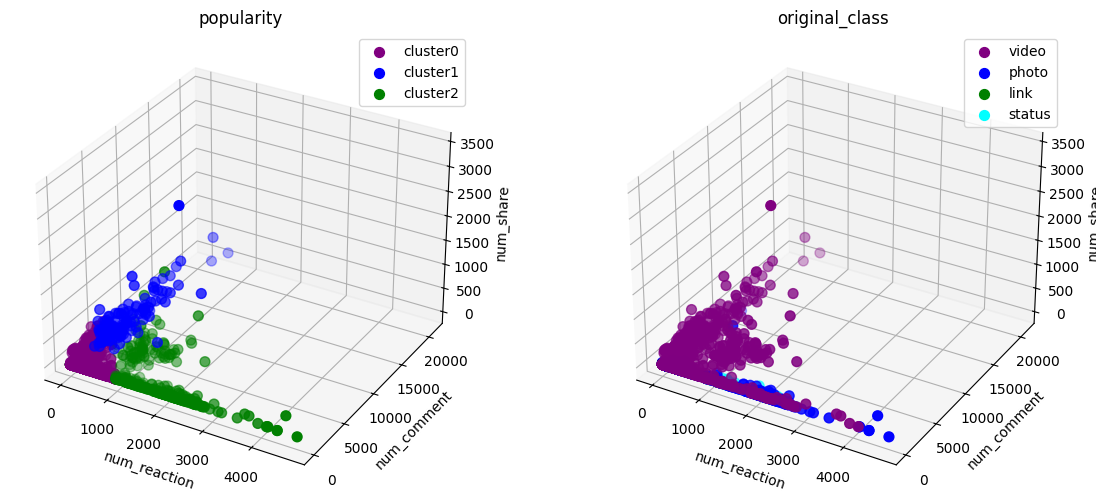

In [7]:
x1 = np.empty((X.shape[0], 3), np.int64)
x1[:,:] = X[:,0:3]
labels = names[0:3]
titl = 'popularity'
# model = SpectralClustering(n_clusters = clusters)
model = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y1 = model.fit_predict(x1)
plot_3d(x1, y1, clusters, labels, titl)

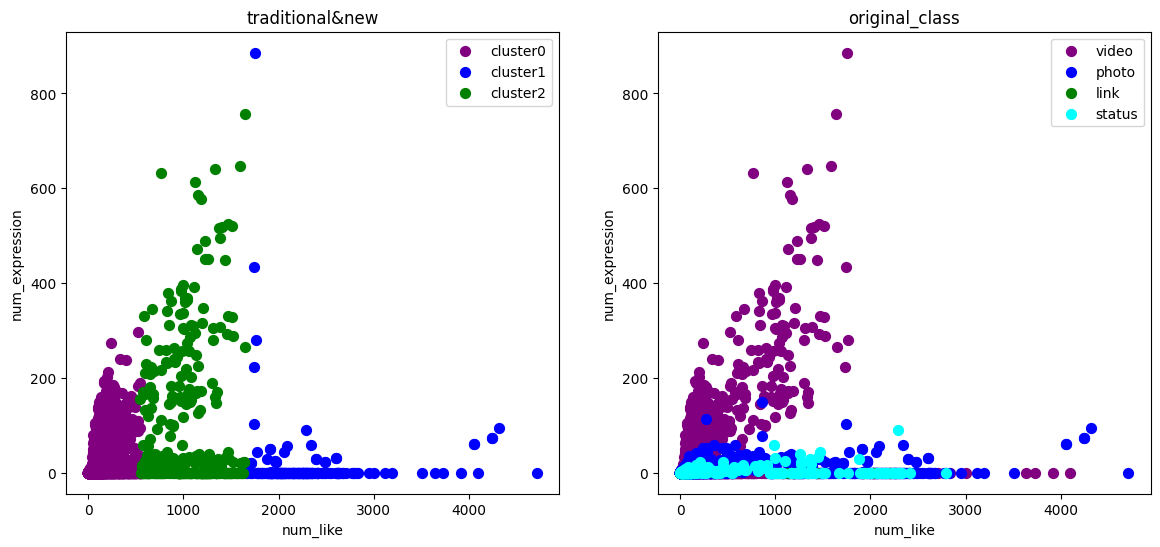

In [8]:
batch_size = 100
x2 = np.empty((X.shape[0], 2), np.int64)
x2[:,0] = X[:,3]
x2[:,1] = X[:,9]
labels = [names[3], names[9]]
titl = 'traditional&new'
# model = MiniBatchKMeans(init='k-means++', n_clusters=clusters, batch_size=batch_size)
model = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y2 = model.fit_predict(x2)
plot_2d(x2, y2, clusters, labels, titl)

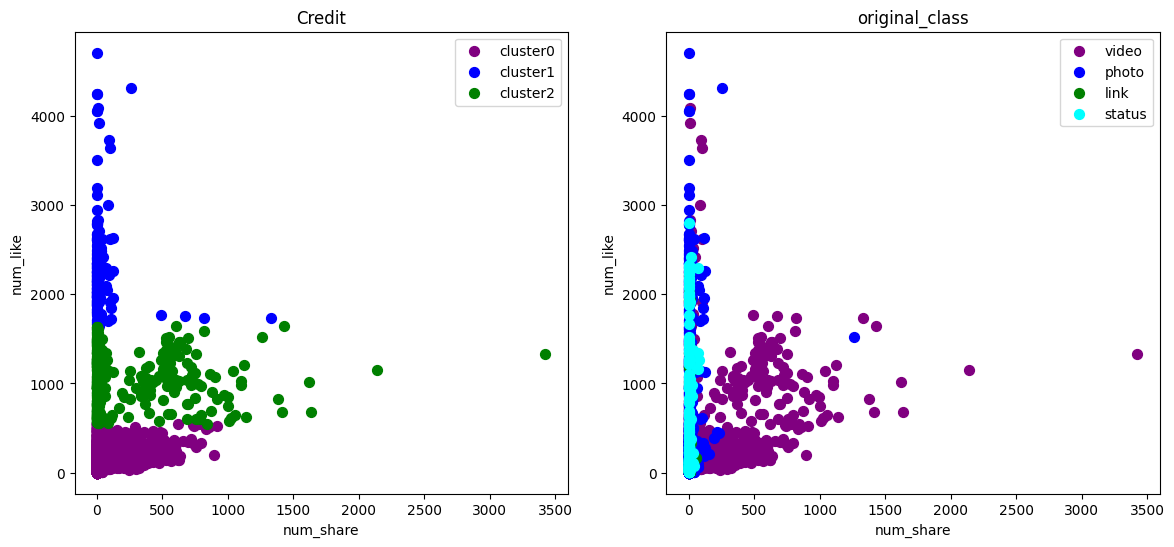

In [9]:
x3 = np.empty((X.shape[0], 2), np.int64)
x3[:,0] = X[:,2]
x3[:,1] = X[:,3]
labels = [names[2], names[3]]
titl = 'Credit'
# model = Birch(n_clusters=clusters)
model = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y3 = model.fit_predict(x2)
plot_2d(x3, y3, clusters, labels, titl)

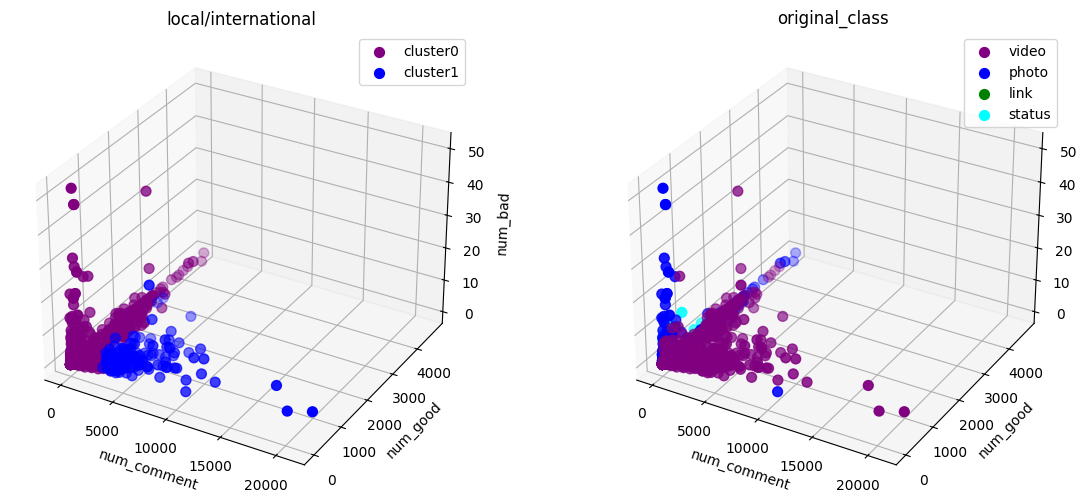

In [10]:
# 均值漂移聚类
x4 = np.empty((X.shape[0], 3), np.int64)
x4[:,0] = X[:,1]
x4[:,1] = X[:,10]
x4[:,2] = X[:, 11]
labels = [names[1], names[10], names[11]]
titl = 'local/international'
# model = MeanShift(n_clusters=clusters)
model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y4 = model.fit_predict(x4)
plot_3d(x4, y4, 2, labels, titl)

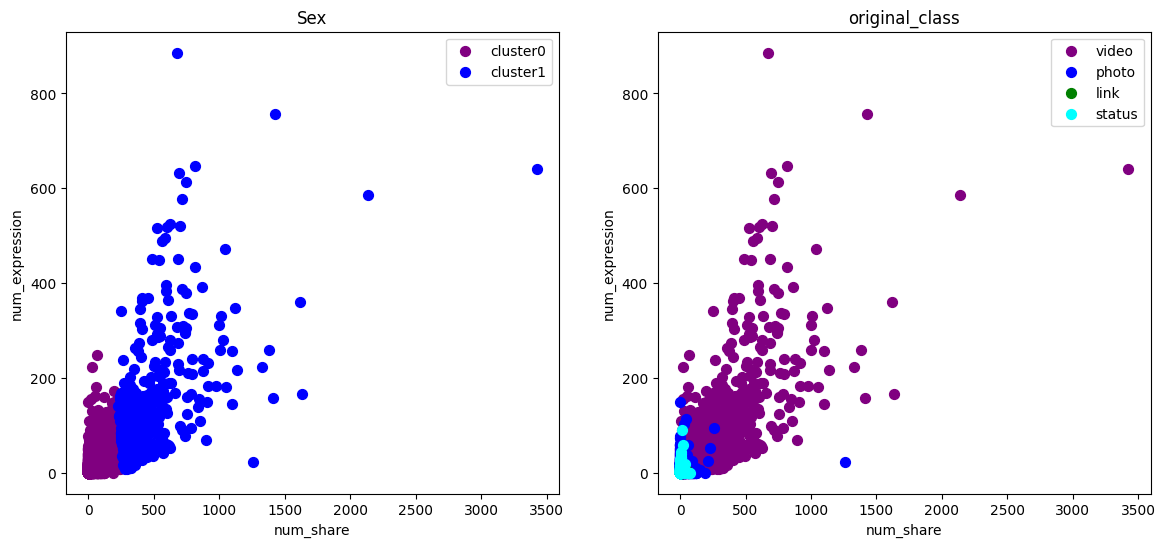

In [11]:
x5 = np.empty((X.shape[0], 2), np.int64)
x5[:,0] = X[:,2]
x5[:,1] = X[:,9]
labels = [names[2], names[9]]
titl = 'Sex'
model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y5 = model.fit_predict(x5)
plot_2d(x5, y5, 2, labels, titl)